In [1]:
!pip install rdkit-pypi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.4/29.4 MB 11.8 MB/s eta 0:00:00


In [2]:
import pandas as pd
import openpyxl
from tqdm import tqdm
import seaborn as sns
import numpy as np
from rdkit import Chem
from rdkit.Chem import Crippen, Descriptors, GraphDescriptors, Lipinski, QED, rdMolDescriptors, AllChem, MACCSkeys

In [3]:
excel_path = 'data.xlsx'
df = pd.read_excel(excel_path, engine="openpyxl")

In [4]:
df_new = df.copy()
df_new.head()

,Index,Substance Name,Name type,CAS Number,Source,Smiles,Class,pka_acid_1,pka_acid_2,pka_acid_3,...,α_acid_0,α_acid_1,α_acid_2,α_acid_3,α_acid_4,α_base_0,α_base_1,α_base_2,α_base_3,α_base_4
0,0,"Cyclopenta[c]cyclopropa[g][1,6]diazacyclotetra...",NaN,923604-58-4,ClassDataset_original,COc1ccc2c(O[C@@H]3C[C@H]4C(=O)N[C@]5(C(=O)O)C[...,0,4.1,10.0,10.0,...,0.000500,0.996990,0.002504,0.000006,1.580122e-08,2.511886e-30,6.309573e-23,1.584893e-15,3.981072e-08,1.0
1,1,2-methylprop-2-enoic acid,IUPAC Name,79-41-4,ClassDataset_original,C=C(C)C(=O)O,1,4.2,10.0,10.0,...,0.000629,0.996861,0.002504,0.000006,1.579918e-08,2.511886e-30,6.309573e-23,1.584893e-15,3.981072e-08,1.0
2,2,3-(Diisobutoxy-thiophosphorylsulfanyl)-2-methy...,IUPAC Name,268567-32-4,ClassDataset_original,CC(C)COP(=S)(OCC(C)C)SCC(C)C(=O)O,0,4.2,10.0,10.0,...,0.000629,0.996861,0.002504,0.000006,1.579918e-08,2.511886e-30,6.309573e-23,1.584893e-15,3.981072e-08,1.0
3,3,"Phenol, 2-methyl-4,6-dinitro-",IUPAC Name,534-52-1,ClassDataset_original,Cc1cc([N+](=O)[O-])cc([N+](=O)[O-])c1O,0,4.2,10.0,10.0,...,0.000629,0.996861,0.002504,0.000006,1.579918e-08,2.511886e-30,6.309573e-23,1.584893e-15,3.981072e-08,1.0
4,4,"2-[4-(1,3-dihydro-1,3-dioxo-2H-isoindol-2-yl)p...",NaN,94232-67-4,ClassDataset_original,CCC(C(=O)O)c1ccc(N2C(=O)c3ccccc3C2=O)cc1,0,4.2,10.0,10.0,...,0.000629,0.996861,0.002504,0.000006,1.579918e-08,2.511886e-30,6.309573e-23,1.584893e-15,3.981072e-08,1.0


**Let's bring the names of the columns to the generally accepted form and remove duplicates**






In [5]:
df_new.columns = [col.lower().replace(' ', '_') for col in df_new.columns]
df_new.drop_duplicates(inplace=True)
df_new

,index,substance_name,name_type,cas_number,source,smiles,class,pka_acid_1,pka_acid_2,pka_acid_3,...,α_acid_0,α_acid_1,α_acid_2,α_acid_3,α_acid_4,α_base_0,α_base_1,α_base_2,α_base_3,α_base_4
0,0,"Cyclopenta[c]cyclopropa[g][1,6]diazacyclotetra...",NaN,923604-58-4,ClassDataset_original,COc1ccc2c(O[C@@H]3C[C@H]4C(=O)N[C@]5(C(=O)O)C[...,0,4.1,10.0,10.0,...,0.000500,0.996990,0.002504,6.290580e-06,1.580122e-08,2.511886e-30,6.309573e-23,1.584893e-15,3.981072e-08,1.000000
1,1,2-methylprop-2-enoic acid,IUPAC Name,79-41-4,ClassDataset_original,C=C(C)C(=O)O,1,4.2,10.0,10.0,...,0.000629,0.996861,0.002504,6.289766e-06,1.579918e-08,2.511886e-30,6.309573e-23,1.584893e-15,3.981072e-08,1.000000
2,2,3-(Diisobutoxy-thiophosphorylsulfanyl)-2-methy...,IUPAC Name,268567-32-4,ClassDataset_original,CC(C)COP(=S)(OCC(C)C)SCC(C)C(=O)O,0,4.2,10.0,10.0,...,0.000629,0.996861,0.002504,6.289766e-06,1.579918e-08,2.511886e-30,6.309573e-23,1.584893e-15,3.981072e-08,1.000000
3,3,"Phenol, 2-methyl-4,6-dinitro-",IUPAC Name,534-52-1,ClassDataset_original,Cc1cc([N+](=O)[O-])cc([N+](=O)[O-])c1O,0,4.2,10.0,10.0,...,0.000629,0.996861,0.002504,6.289766e-06,1.579918e-08,2.511886e-30,6.309573e-23,1.584893e-15,3.981072e-08,1.000000
4,4,"2-[4-(1,3-dihydro-1,3-dioxo-2H-isoindol-2-yl)p...",NaN,94232-67-4,ClassDataset_original,CCC(C(=O)O)c1ccc(N2C(=O)c3ccccc3C2=O)cc1,0,4.2,10.0,10.0,...,0.000629,0.996861,0.002504,6.289766e-06,1.579918e-08,2.511886e-30,6.309573e-23,1.584893e-15,3.981072e-08,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6134,6134,NaN,NaN,NaN,ClassDataset_external,Sc1c(Cl)c(Cl)c(Cl)c(Cl)c1Cl,0,10.0,10.0,10.0,...,0.997488,0.002506,0.000006,1.580912e-08,3.971072e-11,2.511886e-30,6.309573e-23,1.584893e-15,3.981072e-08,1.000000
6135,6135,NaN,NaN,NaN,ClassDataset_external,Sc1cccc2ccccc12,0,6.5,10.0,10.0,...,0.111566,0.886202,0.002226,5.591557e-06,1.404536e-08,2.511886e-30,6.309573e-23,1.584893e-15,3.981072e-08,1.000000
6136,6136,NaN,NaN,NaN,ClassDataset_external,Sc1nc2ccccc2[nH]1,0,2.5,10.0,10.0,...,0.000013,0.997476,0.002506,6.293645e-06,1.580892e-08,3.011353e-24,7.564176e-17,1.900035e-09,4.772672e-02,0.952273
6137,6137,NaN,NaN,NaN,ClassDataset_external,Sc1nc2ccccc2s1,0,2.0,10.0,10.0,...,0.000004,0.997484,0.002506,6.293700e-06,1.580906e-08,2.511886e-30,6.309573e-23,1.584893e-15,3.981072e-08,1.000000


**Let's bring SMILES to the canonical form**



In [6]:
df_new["smiles"] = [Chem.CanonSmiles(smile) for smile in df_new["smiles"]]

[21:01:56] WARNING: not removing hydrogen atom without neighbors
[21:01:56] WARNING: not removing hydrogen atom without neighbors
[21:01:57] WARNING: not removing hydrogen atom without neighbors
[21:01:57] WARNING: not removing hydrogen atom without neighbors
[21:01:57] WARNING: not removing hydrogen atom without neighbors
[21:01:57] WARNING: not removing hydrogen atom without neighbors
[21:01:57] WARNING: not removing hydrogen atom without neighbors
[21:01:57] WARNING: not removing hydrogen atom without neighbors
[21:01:57] WARNING: not removing hydrogen atom without neighbors
[21:01:57] WARNING: not removing hydrogen atom without neighbors
[21:01:57] WARNING: not removing hydrogen atom without neighbors
[21:01:57] WARNING: not removing hydrogen atom without neighbors
[21:01:57] WARNING: not removing hydrogen atom without neighbors
[21:01:57] WARNING: not removing hydrogen atom without neighbors
[21:01:57] WARNING: not removing hydrogen atom without neighbors
[21:01:57] WARNING: not r

**Remove the inorganic**

In [7]:
df_new.shape

(6139, 25)

In [8]:
simpleOrganicAtomQuery = Chem.MolFromSmarts('[!$([#1,#5,#6,#7,#8,#9,#15,#16,#17,#35,#53])]')
simpleOrganicBondQuery = Chem.MolFromSmarts('[#6]-,=,#,:[#6]')
hasCHQuery = Chem.MolFromSmarts('[C!H0]')
def simple_is_organic(mol):
     return (not mol.HasSubstructMatch(simpleOrganicAtomQuery)) and mol.HasSubstructMatch(hasCHQuery) and mol.HasSubstructMatch(simpleOrganicBondQuery)

In [9]:
for inx in range(len(df_new["smiles"])):
    mol = Chem.MolFromSmiles(df_new["smiles"][inx])
    if mol and not simple_is_organic(mol):
        df_new.drop(labels=inx, axis=0, inplace=True)
df_new.reset_index(drop=True, inplace=True)

[21:01:59] WARNING: not removing hydrogen atom without neighbors
[21:01:59] WARNING: not removing hydrogen atom without neighbors
[21:01:59] WARNING: not removing hydrogen atom without neighbors
[21:01:59] WARNING: not removing hydrogen atom without neighbors
[21:01:59] WARNING: not removing hydrogen atom without neighbors
[21:02:00] WARNING: not removing hydrogen atom without neighbors
[21:02:00] WARNING: not removing hydrogen atom without neighbors
[21:02:00] WARNING: not removing hydrogen atom without neighbors
[21:02:00] WARNING: not removing hydrogen atom without neighbors
[21:02:00] WARNING: not removing hydrogen atom without neighbors
[21:02:00] WARNING: not removing hydrogen atom without neighbors
[21:02:00] WARNING: not removing hydrogen atom without neighbors
[21:02:00] WARNING: not removing hydrogen atom without neighbors
[21:02:00] WARNING: not removing hydrogen atom without neighbors
[21:02:00] WARNING: not removing hydrogen atom without neighbors
[21:02:00] WARNING: not r

In [10]:
df_new.shape

(4716, 25)

**Working with passes**

In [11]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4716 entries, 0 to 4715
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   index           4716 non-null   int64  
 1   substance_name  3488 non-null   object 
 2   name_type       2951 non-null   object 
 3   cas_number      3488 non-null   object 
 4   source          4716 non-null   object 
 5   smiles          4716 non-null   object 
 6   class           4716 non-null   int64  
 7   pka_acid_1      4716 non-null   float64
 8   pka_acid_2      4716 non-null   float64
 9   pka_acid_3      4716 non-null   float64
 10  pka_acid_4      4716 non-null   float64
 11  pka_base_1      4716 non-null   float64
 12  pka_base_2      4716 non-null   float64
 13  pka_base_3      4716 non-null   float64
 14  pka_base_4      4716 non-null   float64
 15  α_acid_0        4716 non-null   float64
 16  α_acid_1        4716 non-null   float64
 17  α_acid_2        4716 non-null   f

The substance_name, name_type, and case_number columns need to be deleted, since the values in these columns are not significant for our classification task.

In [12]:
df_new.drop('substance_name', axis=1, inplace=True)
df_new.drop('name_type', axis=1, inplace=True)
df_new.drop('cas_number', axis=1, inplace=True)

In [13]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4716 entries, 0 to 4715
Data columns (total 22 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   index       4716 non-null   int64  
 1   source      4716 non-null   object 
 2   smiles      4716 non-null   object 
 3   class       4716 non-null   int64  
 4   pka_acid_1  4716 non-null   float64
 5   pka_acid_2  4716 non-null   float64
 6   pka_acid_3  4716 non-null   float64
 7   pka_acid_4  4716 non-null   float64
 8   pka_base_1  4716 non-null   float64
 9   pka_base_2  4716 non-null   float64
 10  pka_base_3  4716 non-null   float64
 11  pka_base_4  4716 non-null   float64
 12  α_acid_0    4716 non-null   float64
 13  α_acid_1    4716 non-null   float64
 14  α_acid_2    4716 non-null   float64
 15  α_acid_3    4716 non-null   float64
 16  α_acid_4    4716 non-null   float64
 17  α_base_0    4716 non-null   float64
 18  α_base_1    4716 non-null   float64
 19  α_base_2    4716 non-null  

**Feature generation for training**

There are too few signs for learning. We generate quantitative physico-chemical descriptors and fingerprints

In [14]:
for i, row in df_new.iterrows():
    mol = Chem.MolFromSmiles(row.smiles)
    qed_vector = QED.properties(mol)

    df_new.at[i, 'MW'] = round(qed_vector[0], 2)

    df_new.at[i, 'AlogP'] = round(qed_vector[1], 2)

    df_new.at[i, 'MlogP'] = round(Crippen.MolLogP(mol), 2)

    df_new.at[i, '#HBA'] = qed_vector[2]

    df_new.at[i, '#HBD'] = qed_vector[3]

    df_new.at[i, 'PSA'] = qed_vector[4]

    df_new.at[i, '#ROTB'] = qed_vector[5]

    df_new.at[i, 'MaxPartialCharge'] = round(Descriptors.MaxPartialCharge(mol), 2)

    df_new.at[i, 'MinPartialCharge'] = round(Descriptors.MinPartialCharge(mol), 2)

    df_new.at[i, '#AromaticCarbocycles'] = Lipinski.NumAromaticCarbocycles(mol)

    df_new.at[i, '#AromaticHeterocycles'] = Lipinski.NumAromaticHeterocycles(mol)

    df_new.at[i, '#Heteroatoms'] = Lipinski.NumHeteroatoms(mol)

df_new.head()

[21:02:03] WARNING: not removing hydrogen atom without neighbors
[21:02:03] WARNING: not removing hydrogen atom without neighbors
[21:02:05] WARNING: not removing hydrogen atom without neighbors
[21:02:05] WARNING: not removing hydrogen atom without neighbors
[21:02:09] WARNING: not removing hydrogen atom without neighbors
[21:02:09] WARNING: not removing hydrogen atom without neighbors
[21:02:12] WARNING: not removing hydrogen atom without neighbors
[21:02:12] WARNING: not removing hydrogen atom without neighbors
[21:02:14] WARNING: not removing hydrogen atom without neighbors
[21:02:14] WARNING: not removing hydrogen atom without neighbors
[21:02:14] WARNING: not removing hydrogen atom without neighbors
[21:02:14] WARNING: not removing hydrogen atom without neighbors
[21:02:14] WARNING: not removing hydrogen atom without neighbors
[21:02:14] WARNING: not removing hydrogen atom without neighbors
[21:02:15] WARNING: not removing hydrogen atom without neighbors
[21:02:15] WARNING: not r

,index,source,smiles,class,pka_acid_1,pka_acid_2,pka_acid_3,pka_acid_4,pka_base_1,pka_base_2,...,MlogP,#HBA,#HBD,PSA,#ROTB,MaxPartialCharge,MinPartialCharge,#AromaticCarbocycles,#AromaticHeterocycles,#Heteroatoms
0,0,ClassDataset_original,COc1ccc2c(O[C@@H]3C[C@H]4C(=O)N[C@]5(C(=O)O)C[...,0,4.1,10.0,10.0,10.0,0.0,0.0,...,5.73,8.0,2.0,130.95,6.0,0.33,-0.50,1.0,2.0,11.0
1,1,ClassDataset_original,C=C(C)C(=O)O,1,4.2,10.0,10.0,10.0,0.0,0.0,...,0.65,2.0,1.0,37.30,1.0,0.33,-0.48,0.0,0.0,2.0
2,2,ClassDataset_original,CC(C)COP(=S)(OCC(C)C)SCC(C)C(=O)O,0,4.2,10.0,10.0,10.0,0.0,0.0,...,4.01,6.0,1.0,55.76,10.0,0.31,-0.48,0.0,0.0,7.0
3,3,ClassDataset_original,Cc1cc([N+](=O)[O-])cc([N+](=O)[O-])c1O,0,4.2,10.0,10.0,10.0,0.0,0.0,...,1.52,5.0,1.0,106.51,2.0,0.32,-0.50,1.0,0.0,7.0
4,4,ClassDataset_original,CCC(C(=O)O)c1ccc(N2C(=O)c3ccccc3C2=O)cc1,0,4.2,10.0,10.0,10.0,0.0,0.0,...,3.07,4.0,1.0,74.68,4.0,0.31,-0.48,2.0,0.0,5.0


<Axes: xlabel='MW', ylabel='Count'>

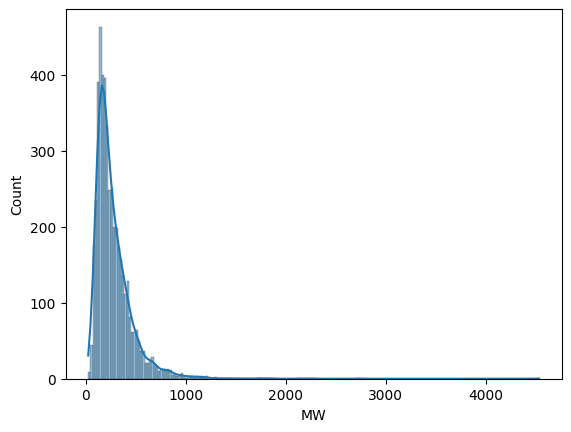

In [15]:
sns.histplot(df_new['MW'], kde=True)

<Axes: xlabel='AlogP', ylabel='Count'>

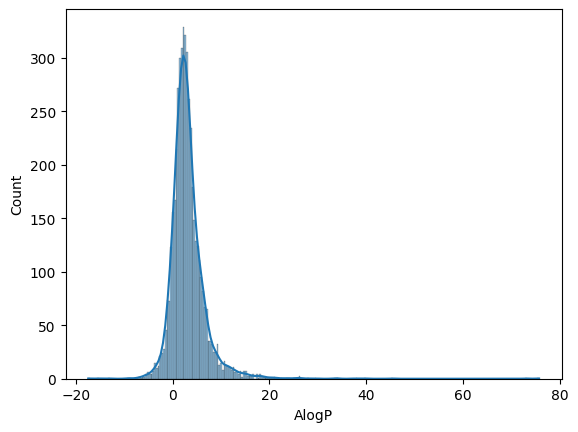

In [16]:
sns.histplot(df_new['AlogP'], kde=True)

<Axes: xlabel='MlogP', ylabel='Count'>

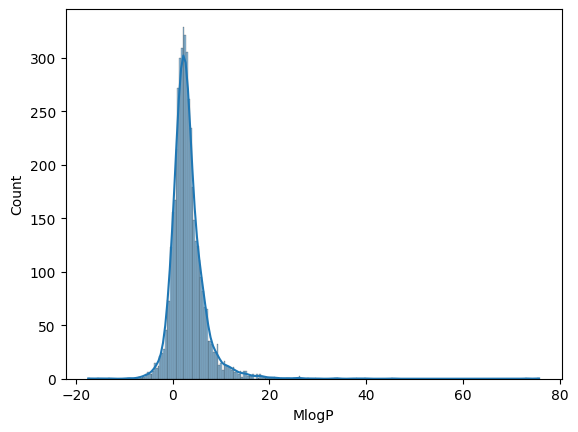

In [17]:
sns.histplot(df_new['MlogP'], kde=True)

<Axes: xlabel='#HBA', ylabel='Count'>

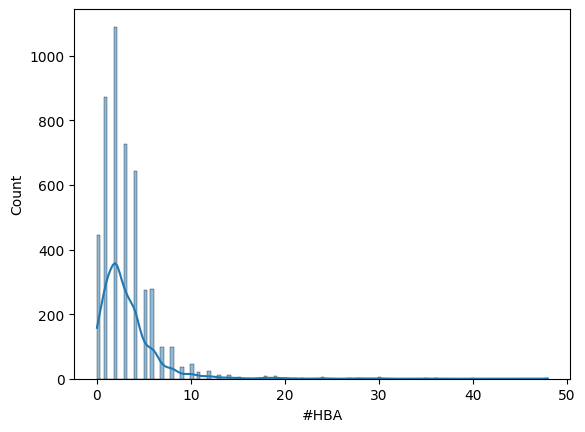

In [18]:
sns.histplot(df_new['#HBA'], kde=True)

In [19]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4716 entries, 0 to 4715
Data columns (total 34 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   index                  4716 non-null   int64  
 1   source                 4716 non-null   object 
 2   smiles                 4716 non-null   object 
 3   class                  4716 non-null   int64  
 4   pka_acid_1             4716 non-null   float64
 5   pka_acid_2             4716 non-null   float64
 6   pka_acid_3             4716 non-null   float64
 7   pka_acid_4             4716 non-null   float64
 8   pka_base_1             4716 non-null   float64
 9   pka_base_2             4716 non-null   float64
 10  pka_base_3             4716 non-null   float64
 11  pka_base_4             4716 non-null   float64
 12  α_acid_0               4716 non-null   float64
 13  α_acid_1               4716 non-null   float64
 14  α_acid_2               4716 non-null   float64
 15  α_ac

Fingerprints

In [20]:
def generate_MACCS(data):
    MACCS_keys = []
    mols = [Chem.MolFromSmiles(x) for x in data if x is not None]
    for mol in tqdm(mols):
        maccs = list(MACCSkeys.GenMACCSKeys(mol).ToBitString())
        MACCS_keys.append(maccs)
    return np.array(MACCS_keys)

In [21]:
MACCS_keys = generate_MACCS(df_new['smiles'])

[21:02:46] WARNING: not removing hydrogen atom without neighbors
[21:02:46] WARNING: not removing hydrogen atom without neighbors
[21:02:46] WARNING: not removing hydrogen atom without neighbors
[21:02:46] WARNING: not removing hydrogen atom without neighbors
[21:02:46] WARNING: not removing hydrogen atom without neighbors
[21:02:46] WARNING: not removing hydrogen atom without neighbors
[21:02:46] WARNING: not removing hydrogen atom without neighbors
[21:02:46] WARNING: not removing hydrogen atom without neighbors
[21:02:46] WARNING: not removing hydrogen atom without neighbors
[21:02:46] WARNING: not removing hydrogen atom without neighbors
[21:02:46] WARNING: not removing hydrogen atom without neighbors
[21:02:46] WARNING: not removing hydrogen atom without neighbors
[21:02:46] WARNING: not removing hydrogen atom without neighbors
[21:02:46] WARNING: not removing hydrogen atom without neighbors
[21:02:46] WARNING: not removing hydrogen atom without neighbors
[21:02:46] WARNING: not r

In [22]:
for i, row in df_new.iterrows():
    for j in range(MACCS_keys.shape[1]):
        df_new.at[i, f'MAC_{j+1}'] =  int(MACCS_keys[i][j])

df_new

<ipython-input-22-090ad58d53a7>:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_new.at[i, f'MAC_{j+1}'] =  int(MACCS_keys[i][j])
<ipython-input-22-090ad58d53a7>:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_new.at[i, f'MAC_{j+1}'] =  int(MACCS_keys[i][j])
<ipython-input-22-090ad58d53a7>:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-frag

,index,source,smiles,class,pka_acid_1,pka_acid_2,pka_acid_3,pka_acid_4,pka_base_1,pka_base_2,...,MAC_158,MAC_159,MAC_160,MAC_161,MAC_162,MAC_163,MAC_164,MAC_165,MAC_166,MAC_167
0,0,ClassDataset_original,COc1ccc2c(O[C@@H]3C[C@H]4C(=O)N[C@]5(C(=O)O)C[...,0,4.1,10.0,10.0,10.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
1,1,ClassDataset_original,C=C(C)C(=O)O,1,4.2,10.0,10.0,10.0,0.0,0.0,...,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,2,ClassDataset_original,CC(C)COP(=S)(OCC(C)C)SCC(C)C(=O)O,0,4.2,10.0,10.0,10.0,0.0,0.0,...,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,3,ClassDataset_original,Cc1cc([N+](=O)[O-])cc([N+](=O)[O-])c1O,0,4.2,10.0,10.0,10.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
4,4,ClassDataset_original,CCC(C(=O)O)c1ccc(N2C(=O)c3ccccc3C2=O)cc1,0,4.2,10.0,10.0,10.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4711,6128,ClassDataset_external,S=C(S)N(Cc1ccccc1)Cc1ccccc1,0,3.1,10.0,10.0,10.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0
4712,6129,ClassDataset_external,S=C(S)NCCNC(=S)S,0,3.4,3.4,4.2,4.2,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4713,6130,ClassDataset_external,S=C(SSC(=S)N(Cc1ccccc1)Cc1ccccc1)N(Cc1ccccc1)C...,0,10.0,10.0,10.0,10.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0
4714,6131,ClassDataset_external,S=C(SSSSC(=S)N1CCCCC1)N1CCCCC1,0,10.0,10.0,10.0,10.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


The MAC_ columns represent binary signs, let's convert the values to a numeric format, since the column type is MAC_ = object

In [23]:
for col in df_new.columns:
    if col.startswith("MAC_"):
      df_new[col] = pd.to_numeric(df_new[col], errors='coerce')

Avalon fingerprints

In [24]:
from rdkit.Avalon import pyAvalonTools

In [25]:
def generate_AVfpts(data):
    Avalon_fpts = []
    mols = [Chem.MolFromSmiles(x) for x in data if x is not None]
    '''Число бит можно регулировать. Обычно используется 512 или 1024'''
    for mol in tqdm(mols):
        avfpts = pyAvalonTools.GetAvalonFP(mol, nBits=512)
        Avalon_fpts.append(avfpts)
    return np.array(Avalon_fpts)

In [26]:
Avalon_fpts = generate_AVfpts(df_new['smiles'])

[21:03:15] WARNING: not removing hydrogen atom without neighbors
[21:03:15] WARNING: not removing hydrogen atom without neighbors
[21:03:15] WARNING: not removing hydrogen atom without neighbors
[21:03:15] WARNING: not removing hydrogen atom without neighbors
[21:03:15] WARNING: not removing hydrogen atom without neighbors
[21:03:15] WARNING: not removing hydrogen atom without neighbors
[21:03:15] WARNING: not removing hydrogen atom without neighbors
[21:03:15] WARNING: not removing hydrogen atom without neighbors
[21:03:15] WARNING: not removing hydrogen atom without neighbors
[21:03:15] WARNING: not removing hydrogen atom without neighbors
[21:03:15] WARNING: not removing hydrogen atom without neighbors
[21:03:15] WARNING: not removing hydrogen atom without neighbors
[21:03:15] WARNING: not removing hydrogen atom without neighbors
[21:03:15] WARNING: not removing hydrogen atom without neighbors
[21:03:15] WARNING: not removing hydrogen atom without neighbors
[21:03:15] WARNING: not r

In [27]:
for i, row in df_new.iterrows():
    for j in range(Avalon_fpts.shape[1]):
        df_new.at[i, f'A_{j+1}'] = Avalon_fpts[i][j]

df_new

<ipython-input-27-3973e77bb1c7>:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_new.at[i, f'A_{j+1}'] = Avalon_fpts[i][j]
<ipython-input-27-3973e77bb1c7>:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_new.at[i, f'A_{j+1}'] = Avalon_fpts[i][j]
<ipython-input-27-3973e77bb1c7>:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, 

,index,source,smiles,class,pka_acid_1,pka_acid_2,pka_acid_3,pka_acid_4,pka_base_1,pka_base_2,...,A_503,A_504,A_505,A_506,A_507,A_508,A_509,A_510,A_511,A_512
0,0,ClassDataset_original,COc1ccc2c(O[C@@H]3C[C@H]4C(=O)N[C@]5(C(=O)O)C[...,0,4.1,10.0,10.0,10.0,0.0,0.0,...,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0
1,1,ClassDataset_original,C=C(C)C(=O)O,1,4.2,10.0,10.0,10.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,ClassDataset_original,CC(C)COP(=S)(OCC(C)C)SCC(C)C(=O)O,0,4.2,10.0,10.0,10.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,3,ClassDataset_original,Cc1cc([N+](=O)[O-])cc([N+](=O)[O-])c1O,0,4.2,10.0,10.0,10.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,ClassDataset_original,CCC(C(=O)O)c1ccc(N2C(=O)c3ccccc3C2=O)cc1,0,4.2,10.0,10.0,10.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4711,6128,ClassDataset_external,S=C(S)N(Cc1ccccc1)Cc1ccccc1,0,3.1,10.0,10.0,10.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4712,6129,ClassDataset_external,S=C(S)NCCNC(=S)S,0,3.4,3.4,4.2,4.2,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4713,6130,ClassDataset_external,S=C(SSC(=S)N(Cc1ccccc1)Cc1ccccc1)N(Cc1ccccc1)C...,0,10.0,10.0,10.0,10.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4714,6131,ClassDataset_external,S=C(SSSSC(=S)N1CCCCC1)N1CCCCC1,0,10.0,10.0,10.0,10.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**Working with categorical features**

Output columns of the object type

In [28]:
obj_df = df_new.select_dtypes(include=['object']).copy()
obj_df.head()

,source,smiles
0,ClassDataset_original,COc1ccc2c(O[C@@H]3C[C@H]4C(=O)N[C@]5(C(=O)O)C[...
1,ClassDataset_original,C=C(C)C(=O)O
2,ClassDataset_original,CC(C)COP(=S)(OCC(C)C)SCC(C)C(=O)O
3,ClassDataset_original,Cc1cc([N+](=O)[O-])cc([N+](=O)[O-])c1O
4,ClassDataset_original,CCC(C(=O)O)c1ccc(N2C(=O)c3ccccc3C2=O)cc1


We are deleting smiles, since it makes no sense to encode smiles due to the large number of unique values.





In [29]:
df_new = df_new.drop('smiles', axis=1)

We delete the source and index, since these values do not matter for our prediction.



In [30]:
df_new = df_new.drop('source', axis=1)

In [31]:
df_new = df_new.drop('index', axis=1)

In [32]:
df_new

,class,pka_acid_1,pka_acid_2,pka_acid_3,pka_acid_4,pka_base_1,pka_base_2,pka_base_3,pka_base_4,α_acid_0,...,A_503,A_504,A_505,A_506,A_507,A_508,A_509,A_510,A_511,A_512
0,0,4.1,10.0,10.0,10.0,0.0,0.0,0.0,0.0,4.996785e-04,...,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0
1,1,4.2,10.0,10.0,10.0,0.0,0.0,0.0,0.0,6.289766e-04,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,4.2,10.0,10.0,10.0,0.0,0.0,0.0,0.0,6.289766e-04,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,0,4.2,10.0,10.0,10.0,0.0,0.0,0.0,0.0,6.289766e-04,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,4.2,10.0,10.0,10.0,0.0,0.0,0.0,0.0,6.289766e-04,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4711,0,3.1,10.0,10.0,10.0,0.0,0.0,0.0,0.0,4.999033e-05,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4712,0,3.4,3.4,4.2,4.2,0.0,0.0,0.0,0.0,3.978560e-15,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4713,0,10.0,10.0,10.0,10.0,0.0,0.0,0.0,0.0,9.974881e-01,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4714,0,10.0,10.0,10.0,10.0,0.0,0.0,0.0,0.0,9.974881e-01,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


We make two tables with separate MACCS and AVALON fingerprints

In [75]:
df_MAC = df_new.iloc[:, :174]
df_MAC

,class,pka_acid_1,pka_acid_2,pka_acid_3,pka_acid_4,pka_base_1,pka_base_2,pka_base_3,α_acid_1,α_acid_2,...,MAC_155,MAC_156,MAC_157,MAC_158,MAC_159,MAC_160,MAC_161,MAC_164,MAC_165,MAC_166
0,0,4.1,10.0,10.0,10.0,0.0,0.0,0.0,9.969897e-01,2.504325e-03,...,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,1,4.2,10.0,10.0,10.0,0.0,0.0,0.0,9.968607e-01,2.504001e-03,...,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0
2,0,4.2,10.0,10.0,10.0,0.0,0.0,0.0,9.968607e-01,2.504001e-03,...,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0
3,0,4.2,10.0,10.0,10.0,0.0,0.0,0.0,9.968607e-01,2.504001e-03,...,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,0,4.2,10.0,10.0,10.0,0.0,0.0,0.0,9.968607e-01,2.504001e-03,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4711,0,3.1,10.0,10.0,10.0,0.0,0.0,0.0,9.974382e-01,2.505452e-03,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
4712,0,3.4,3.4,4.2,4.2,0.0,0.0,0.0,3.978560e-11,3.978560e-07,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4713,0,10.0,10.0,10.0,10.0,0.0,0.0,0.0,2.505577e-03,6.293725e-06,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
4714,0,10.0,10.0,10.0,10.0,0.0,0.0,0.0,2.505577e-03,6.293725e-06,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0


In [71]:
df_s = df_new.iloc[:, :26]
df_e = df_new.iloc[:, 175:]
df_A = pd.concat([df_s, df_e], axis=1)
df_A

,class,pka_acid_1,pka_acid_2,pka_acid_3,pka_acid_4,pka_base_1,pka_base_2,pka_base_3,α_acid_1,α_acid_2,...,A_503,A_504,A_505,A_506,A_507,A_508,A_509,A_510,A_511,A_512
0,0,4.1,10.0,10.0,10.0,0.0,0.0,0.0,9.969897e-01,2.504325e-03,...,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0
1,1,4.2,10.0,10.0,10.0,0.0,0.0,0.0,9.968607e-01,2.504001e-03,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,4.2,10.0,10.0,10.0,0.0,0.0,0.0,9.968607e-01,2.504001e-03,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,0,4.2,10.0,10.0,10.0,0.0,0.0,0.0,9.968607e-01,2.504001e-03,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,4.2,10.0,10.0,10.0,0.0,0.0,0.0,9.968607e-01,2.504001e-03,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4711,0,3.1,10.0,10.0,10.0,0.0,0.0,0.0,9.974382e-01,2.505452e-03,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4712,0,3.4,3.4,4.2,4.2,0.0,0.0,0.0,3.978560e-11,3.978560e-07,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4713,0,10.0,10.0,10.0,10.0,0.0,0.0,0.0,2.505577e-03,6.293725e-06,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4714,0,10.0,10.0,10.0,10.0,0.0,0.0,0.0,2.505577e-03,6.293725e-06,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**Feature selection**

We visualize the mapping of the relationship between numerous variables and removing multicollinearity

Correlation coefficients, like the mean and standard deviation, are sensitive to outliers, without outlier - stronger

In [72]:
corr_matrix = df_MAC.corr()
col_index_to_del = []

In [73]:
for i in range(1, corr_matrix.shape[0]):
    for j in range(1, i):
        if abs(round(corr_matrix.iloc[i][j], 2)) >= 0.9:
            if (i not in col_index_to_del) and (j not in col_index_to_del):
                if corr_matrix.iloc[i][0] >= corr_matrix.iloc[j][0]:
                    col_index_to_del.append(j)
                else:
                    col_index_to_del.append(i)

In [74]:
df_MAC.drop(df_MAC.columns[col_index_to_del], axis=1, inplace=True)
df_MAC.head()

,class,pka_acid_1,pka_acid_2,pka_acid_3,pka_acid_4,pka_base_1,pka_base_2,pka_base_3,α_acid_1,α_acid_2,...,MAC_155,MAC_156,MAC_157,MAC_158,MAC_159,MAC_160,MAC_161,MAC_164,MAC_165,MAC_166
0,0,4.1,10.0,10.0,10.0,0.0,0.0,0.0,0.996990,0.002504,...,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,1,4.2,10.0,10.0,10.0,0.0,0.0,0.0,0.996861,0.002504,...,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0
2,0,4.2,10.0,10.0,10.0,0.0,0.0,0.0,0.996861,0.002504,...,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0
3,0,4.2,10.0,10.0,10.0,0.0,0.0,0.0,0.996861,0.002504,...,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,0,4.2,10.0,10.0,10.0,0.0,0.0,0.0,0.996861,0.002504,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [78]:
corr_matrix_A = df_A.corr()
col_index_to_del_A = []

In [79]:
for i in range(1, corr_matrix_A.shape[0]):
    for j in range(1, i):
        if abs(round(corr_matrix_A.iloc[i][j], 2)) >= 0.9:
            if (i not in col_index_to_del_A) and (j not in col_index_to_del_A):
                if corr_matrix_A.iloc[i][0] >= corr_matrix_A.iloc[j][0]:
                    col_index_to_del_A.append(j)
                else:
                    col_index_to_del_A.append(i)

In [80]:
df_A.drop(df_A.columns[col_index_to_del_A], axis=1, inplace=True)
df_A.head()

,class,pka_acid_1,pka_acid_2,pka_acid_3,pka_acid_4,pka_base_1,pka_base_2,pka_base_3,α_acid_1,α_acid_2,...,A_503,A_504,A_505,A_506,A_507,A_508,A_509,A_510,A_511,A_512
0,0,4.1,10.0,10.0,10.0,0.0,0.0,0.0,0.996990,0.002504,...,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0
1,1,4.2,10.0,10.0,10.0,0.0,0.0,0.0,0.996861,0.002504,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,4.2,10.0,10.0,10.0,0.0,0.0,0.0,0.996861,0.002504,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,0,4.2,10.0,10.0,10.0,0.0,0.0,0.0,0.996861,0.002504,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,4.2,10.0,10.0,10.0,0.0,0.0,0.0,0.996861,0.002504,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


**Statistical criterion of mutual information**

In [81]:
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, KFold, cross_validate, GridSearchCV
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import make_scorer, roc_auc_score, f1_score
from sklearn.svm import SVC
import matplotlib.pyplot as plt
%matplotlib inline

In [82]:
def select_features(X, y):
    fs = SelectKBest(score_func=mutual_info_classif, k='all')
    fs.fit(X, y)
    X_fs = fs.transform(X)
    return X_fs, fs

In [83]:
y_MAC = df_MAC['class']
X_MAC = df_MAC.drop('class', axis=1)

In [84]:
X_fs_MAC, fs_MAC = select_features(X_MAC, y_MAC)

In [85]:
cols_idxs = fs_MAC.get_support(indices=True)
df_MAC = df_MAC.iloc[:, cols_idxs]

In [86]:
df_MAC

,class,pka_acid_1,pka_acid_2,pka_acid_3,pka_acid_4,pka_base_1,pka_base_2,pka_base_3,α_acid_1,α_acid_2,...,MAC_154,MAC_155,MAC_156,MAC_157,MAC_158,MAC_159,MAC_160,MAC_161,MAC_164,MAC_165
0,0,4.1,10.0,10.0,10.0,0.0,0.0,0.0,9.969897e-01,2.504325e-03,...,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,1,4.2,10.0,10.0,10.0,0.0,0.0,0.0,9.968607e-01,2.504001e-03,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0
2,0,4.2,10.0,10.0,10.0,0.0,0.0,0.0,9.968607e-01,2.504001e-03,...,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0
3,0,4.2,10.0,10.0,10.0,0.0,0.0,0.0,9.968607e-01,2.504001e-03,...,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,0,4.2,10.0,10.0,10.0,0.0,0.0,0.0,9.968607e-01,2.504001e-03,...,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4711,0,3.1,10.0,10.0,10.0,0.0,0.0,0.0,9.974382e-01,2.505452e-03,...,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
4712,0,3.4,3.4,4.2,4.2,0.0,0.0,0.0,3.978560e-11,3.978560e-07,...,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
4713,0,10.0,10.0,10.0,10.0,0.0,0.0,0.0,2.505577e-03,6.293725e-06,...,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
4714,0,10.0,10.0,10.0,10.0,0.0,0.0,0.0,2.505577e-03,6.293725e-06,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0


In [87]:
df_MAC.to_csv('data_MAC', sep=';')

In [88]:
y_A = df_A['class']
X_A = df_A.drop('class', axis=1)

In [89]:
X_fs_A, fs_A = select_features(X_A, y_A)

In [90]:
cols_idxs = fs_A.get_support(indices=True)
df_A = df_A.iloc[:, cols_idxs]

In [91]:
df_A

,class,pka_acid_1,pka_acid_2,pka_acid_3,pka_acid_4,pka_base_1,pka_base_2,pka_base_3,α_acid_1,α_acid_2,...,A_502,A_503,A_504,A_505,A_506,A_507,A_508,A_509,A_510,A_511
0,0,4.1,10.0,10.0,10.0,0.0,0.0,0.0,9.969897e-01,2.504325e-03,...,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0
1,1,4.2,10.0,10.0,10.0,0.0,0.0,0.0,9.968607e-01,2.504001e-03,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,4.2,10.0,10.0,10.0,0.0,0.0,0.0,9.968607e-01,2.504001e-03,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
3,0,4.2,10.0,10.0,10.0,0.0,0.0,0.0,9.968607e-01,2.504001e-03,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0,4.2,10.0,10.0,10.0,0.0,0.0,0.0,9.968607e-01,2.504001e-03,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4711,0,3.1,10.0,10.0,10.0,0.0,0.0,0.0,9.974382e-01,2.505452e-03,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
4712,0,3.4,3.4,4.2,4.2,0.0,0.0,0.0,3.978560e-11,3.978560e-07,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4713,0,10.0,10.0,10.0,10.0,0.0,0.0,0.0,2.505577e-03,6.293725e-06,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4714,0,10.0,10.0,10.0,10.0,0.0,0.0,0.0,2.505577e-03,6.293725e-06,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [92]:
df_A.to_csv('data_A', sep=';')

**Seaborn Heatmap**

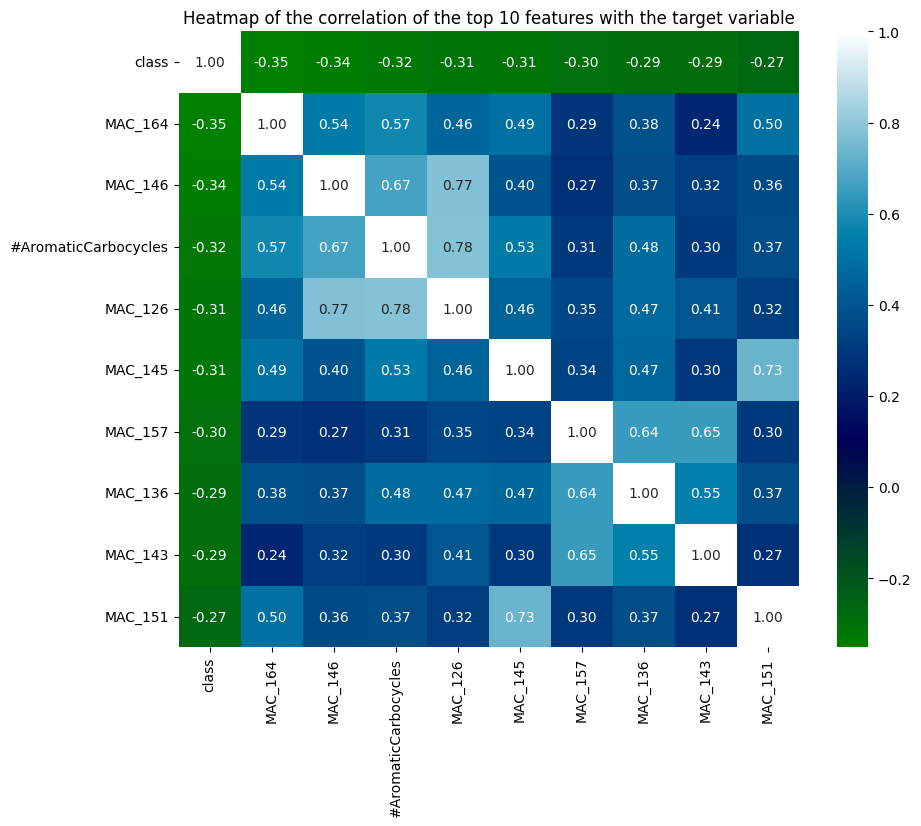

In [96]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


target_corr = df_MAC.corr()['class'].abs().sort_values(ascending=False)
top_features = target_corr.head(10)

correlation_matrix = df_MAC[top_features.index].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='ocean', fmt=".2f")
plt.title('Heatmap of the correlation of the top 10 features with the target variable')
plt.show()


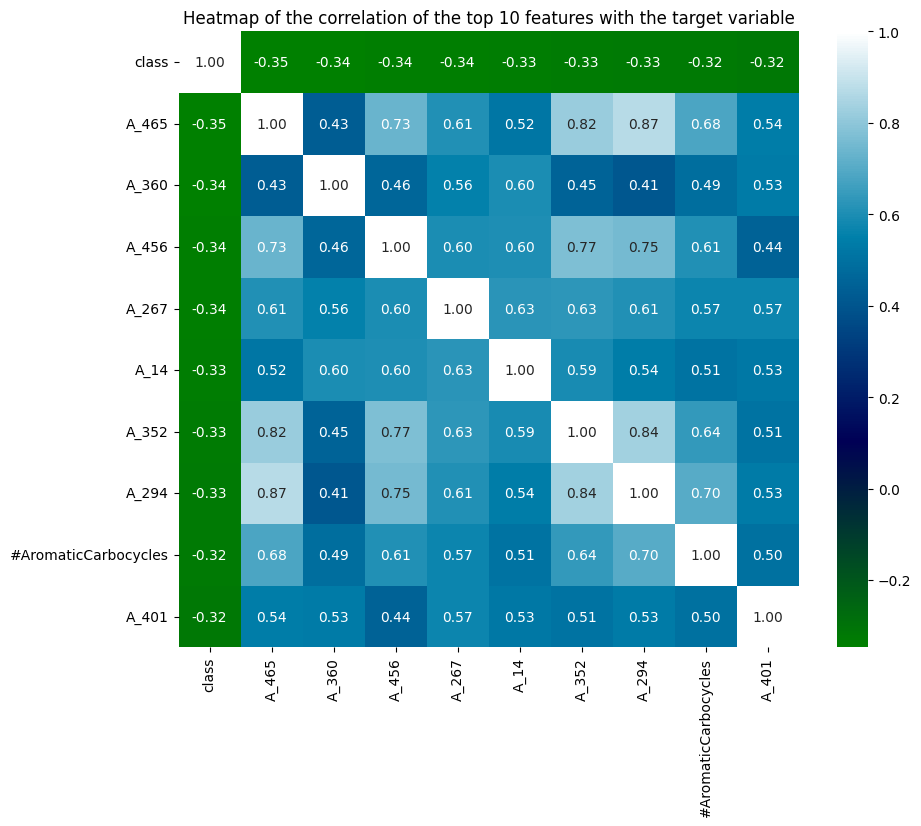

In [97]:
target_corr = df_A.corr()['class'].abs().sort_values(ascending=False)
top_features = target_corr.head(10)

correlation_matrix = df_A[top_features.index].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='ocean', fmt=".2f")
plt.title('Heatmap of the correlation of the top 10 features with the target variable')
plt.show()